# 개별 코드 

In [1]:
# 데이터 불러오기 
from sklearn import datasets

raw_face=datasets.fetch_lfw_people(min_faces_per_person=20, 
                                   resize= 0.5, 
                                   color=False)

In [2]:
# 데이터 형태
n_samples, h, w = raw_face.images.shape
print(n_samples)
print(h)
print(w)

X = raw_face.data
n, p = X.shape
print(n)
print(p)

y = raw_face.target
target_names = raw_face.target_names
k = target_names.shape[0]
print(k)

3023
62
47
3023
2914
62


In [3]:
# 트레이닝/테스트 데이터 분할
from sklearn.model_selection import train_test_split

X_tn, X_te, y_tn, y_te=train_test_split(X,y,random_state=1)

In [4]:
# 비음수 행렬 분해
from sklearn.decomposition import NMF

nmf = NMF(n_components=10, random_state=0)
nmf.fit(X_tn)
X_tn_nmf = nmf.transform(X_tn)
X_te_nmf = nmf.transform(X_te)

C:\Anaconda\lib\site-packages\sklearn\decomposition\_nmf.py:312: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(("The 'init' value, when 'init=None' and "
C:\Anaconda\lib\site-packages\sklearn\decomposition\_nmf.py:1090: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn("Maximum number of iterations %d reached. Increase it to"


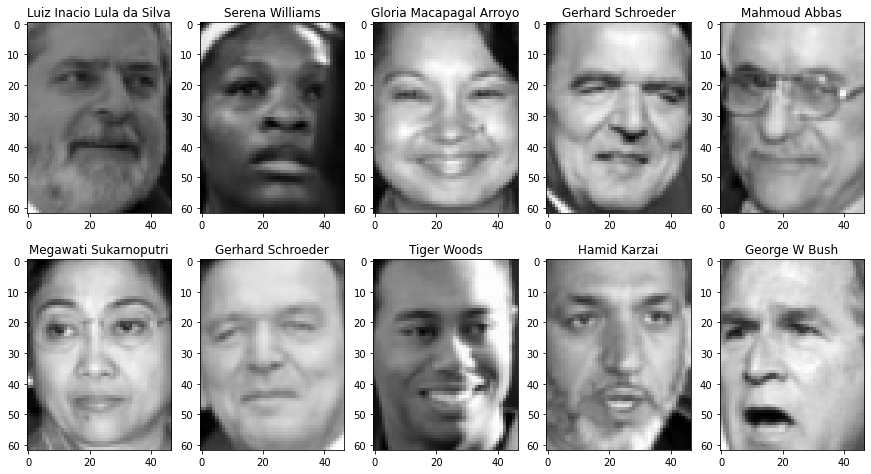

In [5]:
# 원본 데이터 시각화
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 8))
plt.gray()

for i in range(2*5):
    plt.subplot(2, 5, i+1)
    plt.imshow(X_tn[i].reshape((h, w)))
    plt.title(target_names[y_tn[i]])
    
plt.show()

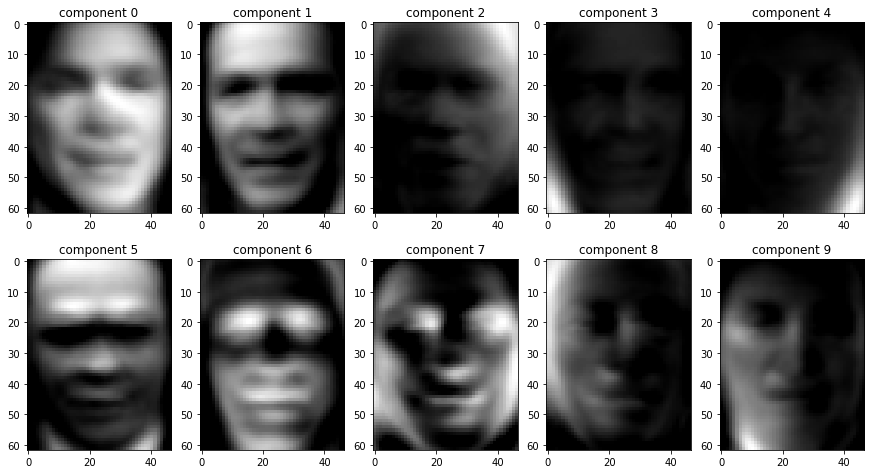

In [6]:
# 비음수 행렬 분해 적합 이후 시각화
plt.figure(figsize=(15, 8))
plt.gray()

for i in range(2*5):
    plt.subplot(2, 5, i+1)
    plt.imshow(nmf.components_[i].reshape((h, w)))
    plt.title("component {}".format(i))
    
plt.show()

# 통합 코드

3023
62
47
3023
2914
62


C:\Anaconda\lib\site-packages\sklearn\decomposition\_nmf.py:312: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(("The 'init' value, when 'init=None' and "
C:\Anaconda\lib\site-packages\sklearn\decomposition\_nmf.py:1090: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn("Maximum number of iterations %d reached. Increase it to"


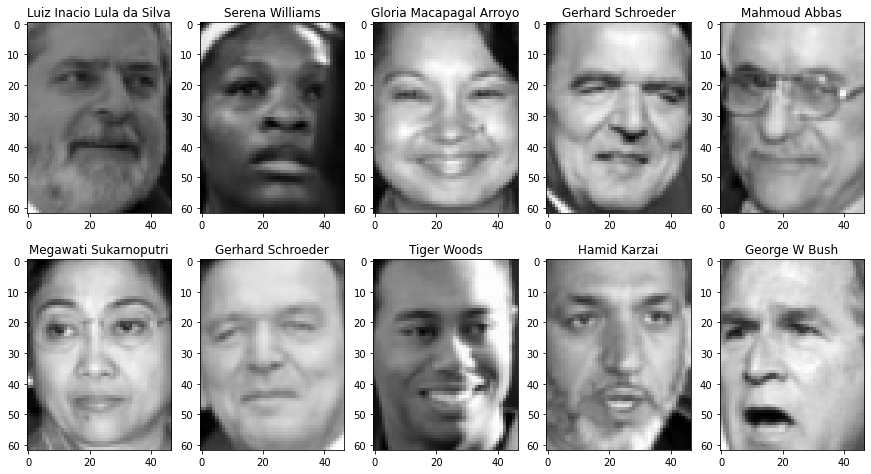

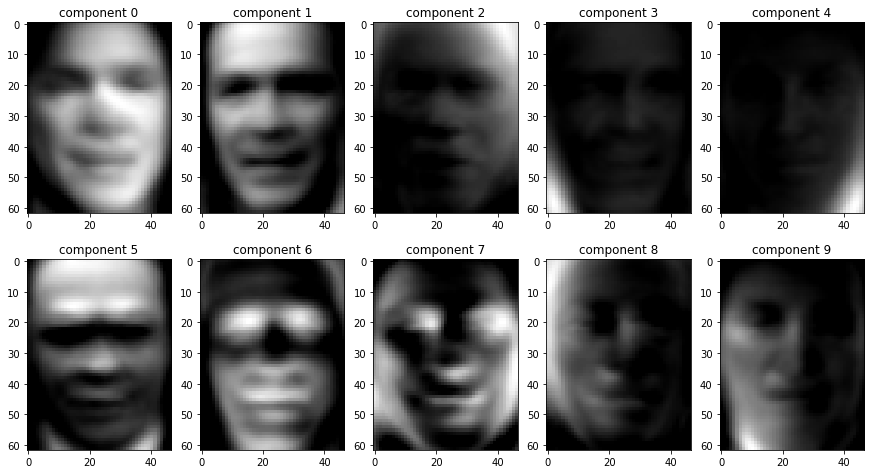

In [7]:
from sklearn import datasets
from sklearn.model_selection import train_test_split

from sklearn.decomposition import NMF
import matplotlib.pyplot as plt

# 데이터 불러오기 
raw_face=datasets.fetch_lfw_people(min_faces_per_person=20, 
                                   resize= 0.5, 
                                   color=False)
# 데이터 살펴보기
n_samples, h, w = raw_face.images.shape
print(n_samples)
print(h)
print(w)

X = raw_face.data
n, p = X.shape
print(n)
print(p)

y = raw_face.target
target_names = raw_face.target_names
k = target_names.shape[0]
print(k)

# 트레이닝/테스트 데이터 분할
X_tn, X_te, y_tn, y_te=train_test_split(X,y,random_state=1)

# 비음수 행렬 분해
nmf = NMF(n_components=10, random_state=0)
nmf.fit(X_tn)
X_tn_nmf = nmf.transform(X_tn)
X_te_nmf = nmf.transform(X_te)

# 원본 데이터 시각화
plt.figure(figsize=(15, 8))
plt.gray()

for i in range(2*5):
    plt.subplot(2, 5, i+1)
    plt.imshow(X_tn[i].reshape((h, w)))
    plt.title(target_names[y_tn[i]])
    
plt.show()

# 비음수 행렬 분해 적합 이후 시각화
plt.figure(figsize=(15, 8))
plt.gray()

for i in range(2*5):
    plt.subplot(2, 5, i+1)
    plt.imshow(nmf.components_[i].reshape((h, w)))
    plt.title("component {}".format(i))
    
plt.show()